In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv(r"../data/marketingcampaigns.csv", sep=';', on_bad_lines='skip')

In [3]:
df

,"campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue"
0,"Public-key multi-tasking throughput,2023-04-01..."
1,"De-engineered analyzing task-force,2023-02-15,..."
2,"Balanced solution-oriented Local Area Network,..."
3,"Distributed real-time methodology,2022-09-26,2..."
4,"Front-line executive infrastructure,2023-07-07..."
...,...
1032,"No revenue campaign,2023-02-01,2023-08-01,2000..."
1033,"Random mess,2023-06-06,,100000,,podcast,,refer..."
1034,"Invalid budget,2022-12-01,2023-06-01,abc,,emai..."
1035,"Overlapping dates,2023-03-01,2022-12-31,60000,..."


In [4]:
df.info

<bound method DataFrame.info of      campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
0     Public-key multi-tasking throughput,2023-04-01...                                               
1     De-engineered analyzing task-force,2023-02-15,...                                               
2     Balanced solution-oriented Local Area Network,...                                               
3     Distributed real-time methodology,2022-09-26,2...                                               
4     Front-line executive infrastructure,2023-07-07...                                               
...                                                 ...                                               
1032  No revenue campaign,2023-02-01,2023-08-01,2000...                                               
1033  Random mess,2023-06-06,,100000,,podcast,,refer...                                               
1034  Invalid budget,2022-12-01,2023-06-0

In [5]:
df.shape #filas y columnas

(1037, 1)

In [6]:
df.columns #columnas

Index(['campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue'], dtype='object')

In [7]:
df.isnull().sum() #suma de los valores nulos por columna

campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue    0
dtype: int64

In [8]:
df.isnull().sum() / len(df) * 100    #proporcion de los valores nulos por columna

campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue    0.0
dtype: float64

In [9]:
df.duplicated() #verifica si hay filas duplicadas

0       False
1       False
2       False
3       False
4       False
        ...  
1032    False
1033    False
1034    False
1035    False
1036    False
Length: 1037, dtype: bool

In [10]:
df.duplicated().sum() #suma de los valores duplicados por fila

np.int64(14)

In [11]:
df = df.drop_duplicates() #elimina filas duplicadas

In [12]:
df.duplicated().sum() #suma de los valores duplicados por fila

np.int64(0)

<Axes: >

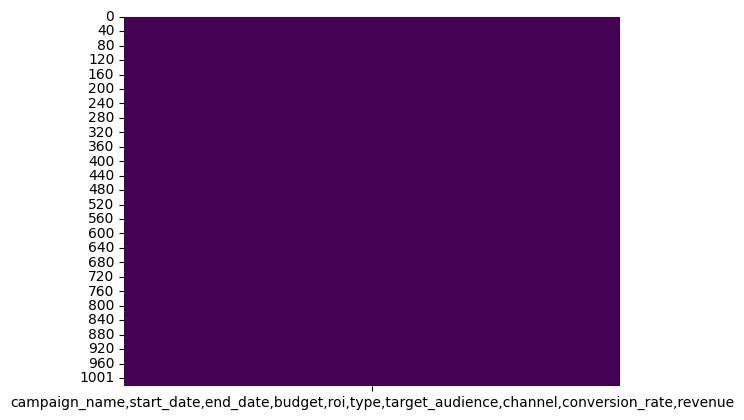

In [13]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis') #grafica de los valores nulos

In [14]:
# Ensure the data is properly separated into columns
df = pd.read_csv(r"../data/marketingcampaigns.csv", sep=',', on_bad_lines='skip')

# Convert 'start_date' and 'end_date' to datetime
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')
df['end_date'] = pd.to_datetime(df['end_date'], errors='coerce')

# Calculate the mean dates
fecha_inicio_promedio = df['start_date'].mean()
fecha_fin_promedio = df['end_date'].mean()

print("Fecha promedio de inicio:", fecha_inicio_promedio)
print("Fecha promedio de fin:", fecha_fin_promedio)


Fecha promedio de inicio: 2023-01-30 14:19:14.518950144
Fecha promedio de fin: 2024-01-30 01:05:46.355685120


In [15]:
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')
df['end_date'] = pd.to_datetime(df['end_date'], errors='coerce')

start_mean = df['start_date'].mean()
end_mean = df['end_date'].mean()

df['start_date'].fillna(start_mean, inplace=True)
df['end_date'].fillna(end_mean, inplace=True)


In [16]:
#canal mas utilizado
canal_mas_usado = df['channel'].mode()[0]
print("Canal más frecuente:", canal_mas_usado)


Canal más frecuente: promotion


In [17]:
moda_channel = df['channel'].mode()[0]  # Obtiene el valor más frecuente
df['channel'].fillna(moda_channel, inplace=True)


In [18]:
#calcular media de columnas numericas
# Forzar conversión a numérico ignorando errores
columnas_numericas = ['roi', 'budget', 'conversion_rate', 'revenue']
for col in columnas_numericas:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # convierte strings a NaN si no se puede

# Calcular la media
for col in columnas_numericas:
    media = df[col].mean()
    print(f"Media de {col}: {media:.2f}")


Media de roi: 0.53
Media de budget: 58995.98
Media de conversion_rate: 0.54
Media de revenue: 511591.20


In [19]:
columnas_numericas = ['roi', 'budget', 'conversion_rate', 'revenue']
for col in columnas_numericas:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Asegura que sean numéricas
    media = df[col].mean()  # Calcula la media ignorando NaNs
    df[col].fillna(media, inplace=True)  # Rellena los nulos con la media


##### Como habían pocos datos nulos, he decidido rellenar con la media

In [20]:
# Asegurarse de que las columnas sean numéricas
df['type'] = pd.to_numeric(df['type'], errors='coerce')
df['target_audience'] = pd.to_numeric(df['target_audience'], errors='coerce')

# Calcular la media de las columnas
media_type = df['type'].mean()
media_target_audience = df['target_audience'].mean()

print("Media de 'type':", media_type)
print("Media de 'target_audience':", media_target_audience)

# Rellenar los valores nulos con la media correspondiente
df['type'].fillna(media_type, inplace=True)
df['target_audience'].fillna(media_target_audience, inplace=True)

Media de 'type': nan
Media de 'target_audience': nan


In [21]:
# Ver el tipo de datos de la columna 'type'
tipo_type = df['type'].dtype
print(f'Type es: {tipo_type}')
tipo_target_audience = df['target_audience'].dtype
print(f'Target_audience es: {tipo_target_audience}')

Type es: float64
Target_audience es: float64


In [22]:
# Calcular la media de 'type' y 'target_audience'
media_type = df['type'].mean()
media_target_audience = df['target_audience'].mean()

# Rellenar los valores nulos con la media
df['type'].fillna(media_type, inplace=True)
df['target_audience'].fillna(media_target_audience, inplace=True)

# Mostrar las medias calculadas
print(f"Media de 'type': {media_type}")
print(f"Media de 'target_audience': {media_target_audience}")


Media de 'type': nan
Media de 'target_audience': nan


In [23]:
print(df.dtypes)

campaign_name              object
start_date         datetime64[ns]
end_date           datetime64[ns]
budget                    float64
roi                       float64
type                      float64
target_audience           float64
channel                    object
conversion_rate           float64
revenue                   float64
dtype: object


In [24]:
#convertimos type y target_audience a string
df['type'] = df['type'].astype(str)
df['target_audience'] = df['target_audience'].astype(str)

In [25]:
print(df.dtypes)

campaign_name              object
start_date         datetime64[ns]
end_date           datetime64[ns]
budget                    float64
roi                       float64
type                       object
target_audience            object
channel                    object
conversion_rate           float64
revenue                   float64
dtype: object


In [26]:
df.isnull().sum() #verifico que ya no hay valores nulos en el dataframe limpio

campaign_name      0
start_date         0
end_date           0
budget             0
roi                0
type               0
target_audience    0
channel            0
conversion_rate    0
revenue            0
dtype: int64

In [27]:
df.isnull().sum() / len(df) * 100

campaign_name      0.0
start_date         0.0
end_date           0.0
budget             0.0
roi                0.0
type               0.0
target_audience    0.0
channel            0.0
conversion_rate    0.0
revenue            0.0
dtype: float64

<Axes: >

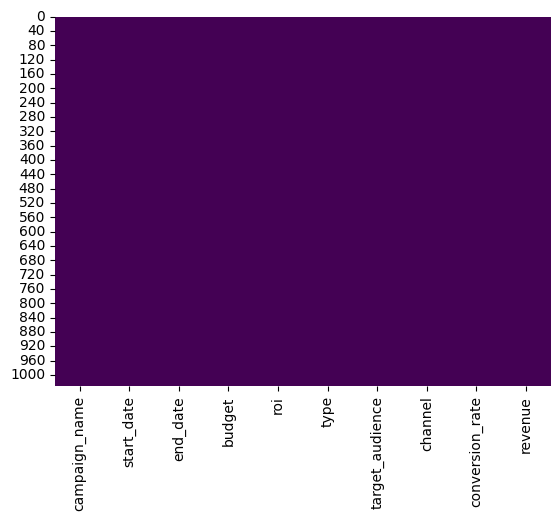

In [28]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis') #grafica de los valores nulos

In [29]:
print(df.columns.tolist())


['campaign_name', 'start_date', 'end_date', 'budget', 'roi', 'type', 'target_audience', 'channel', 'conversion_rate', 'revenue']


In [30]:
df.columns = df.columns.str.strip() # Elimina espacios en blanco al inicio y al final de los nombres de las columnas

In [31]:
print(df.columns.tolist())

['campaign_name', 'start_date', 'end_date', 'budget', 'roi', 'type', 'target_audience', 'channel', 'conversion_rate', 'revenue']


In [32]:
# sin tratar de separarlo en columnas.
with open(r"..\data\marketingcampaigns.csv", encoding='utf-8') as f:
    for i in range(10):
        print(f.readline())

campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue

Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.3,0.35,email,B2B,organic,0.4,709593.48

De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.1

Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.1,0.37,podcast,B2B,paid,0.28,458227.42

Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73

Front-line executive infrastructure,2023-07-07,2024-05-15,39291.9,0.3,social media,B2B,promotion,0.81,47511.35

Upgradable transitional data-warehouse,2023-06-29,2023-12-13,75569.28,0.59,social media,B2C,referral,0.67,558302.11

Innovative context-sensitive framework,2023-03-01,2024-02-23,28964.45,0.59,email,B2C,referral,0.17,172882.59

User-friendly client-driven service-desk,2023-01-06,2023-12-11,36800.58,0.4,webinar,B2C,promotion,0.52,206241.46

Proactive neutral me

In [33]:
#Separamos las columnas por comas
#df = pd.read_csv(r"..\data\marketingcampaigns.csv", sep=',', on_bad_lines='skip')

In [34]:
columnas_numericas = ['budget', 'roi', 'conversion_rate', 'revenue']

for col in columnas_numericas:
    if col in df.columns:
        print(f"✅ '{col}' está presente.")
    else:
        print(f"❌ '{col}' NO está en el DataFrame.")



✅ 'budget' está presente.
✅ 'roi' está presente.
✅ 'conversion_rate' está presente.
✅ 'revenue' está presente.


In [35]:
df['roi'] #una columna

0       0.350000
1       0.740000
2       0.370000
3       0.470000
4       0.300000
          ...   
1027    0.300000
1028    0.533804
1029    0.533804
1030    0.600000
1031    0.800000
Name: roi, Length: 1032, dtype: float64

In [36]:
#como arreglo los valores nulos sin cargarnos los datos originales
df_limpio = df.copy() #copia del dataframe original

In [37]:
df_limpio.head(3) #verifico que la copia se haya hecho bien

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.30,0.35,nan,nan,organic,0.40,709593.48
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,nan,nan,promotion,0.66,516609.10
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.10,0.37,nan,nan,paid,0.28,458227.42


In [43]:
df_limpio.isnull().sum() #verifico que ya no hay valores nulos en el dataframe limpio

campaign_name      0
start_date         0
end_date           0
budget             0
roi                0
type               0
target_audience    0
channel            0
conversion_rate    0
revenue            0
dtype: int64

In [39]:
df_limpio.duplicated().sum() #suma de los valores duplicados por fila

np.int64(16)

In [41]:
df_limpio = df_limpio.drop_duplicates() #elimina filas duplicadas

In [42]:
df_limpio.duplicated().sum() #suma de los valores duplicados por fila

np.int64(0)

In [44]:
df_limpio.to_csv(r'../data/marketingcampaigns_limpio.csv',index=False) #guardo el dataframe limpio en un nuevo archivo csv